# AI - OLA 4
Andreas, Owais & Rasmus

<img src="./images/cnnimages/catordog.gif" alt="Showcasing objective" title="CatorDog" width="600" />

The project work involves solving the following tasks:
1. Obtaining, importing, and pre-processing of data, appropriate for supervised machine learning - classification of images. We use the data from the following [link](https://github.com/datsoftlyngby/soft2024spring-ai/tree/main/Data/CNN).
2. Building and training a model of convolutional neural network (CNN) for recognition of patterns and classification of images based on these patterns.
3. Validating and testing the model with both labelled and not labelled images.
4. Assessing the quality of the model by means of proper measures and criteria.
5. Discussing the process and the product of the project by answering the questions:
- Based on your experience, how would you define ANN and CNN?
- Which hyper-parameters of the CNN architecture have you fine-tuned?
- Which is the role of the activation functions in ANN? Which of them you have implemented?Illustrate them.
- Can you see any advantages and disadvantages of ANN and CNN used for classification in
comparison to the other classification algorithms you are familiar with? Give some examples.

## Data Description
We've got two folders: **train** and **test**, each containing training and test images of dogs and cats, respectively, within their own folders **cats** and **dogs**. The training folder contains a total of 20000 images, with 10000 dogs and 10000 cats. Our objective is for our model to predict whether a new image input contains either a dog or a cat. The model will output a value closer to 1 for images containing dogs and closer to 0 for images containing cats.

## Installing & loading the libraries

In [4]:
import os
os.getcwd()

'/Users/owaisdashti/Software2425/AI_Assignments/OLA4'

In [5]:
import sys
sys.version

'3.12.3 (main, Apr  9 2024, 08:09:14) [Clang 15.0.0 (clang-1500.3.9.4)]'

In [6]:
!python3 -V

Python 3.12.3


In [5]:
#!pip3 install tensorflow --break-system-packages

In [7]:
import glob
from PIL import Image
import cv2
import tensorflow as tf
import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as ran
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

In [8]:
# TF Version
tf.__version__

'2.16.1'

## Loading the training and testing data

In [9]:
DIRECTORY = "./train"
TEST_DIRECTORY = "./test"
CATEGORIES = ["cats", "dogs"]
data = []
test_data = []
img_size = 128

In [10]:
# READING TRAINING DATA
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category) # 0 = cats, 1 = dogs
    
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB) # Convert to RGB (cv2 loads images as BGR)
        img_arr = cv2.resize(img_arr, (img_size, img_size)) # Resize since the images vary in size
        data.append([img_arr, label]) # Adding the image array and its label to the data list

In [11]:
# DOING THE SAME AS ABOVE BUT FOR THE TESTING DATA
for category in CATEGORIES:
    folder = os.path.join(TEST_DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
        img_arr = cv2.resize(img_arr, (img_size, img_size))
        test_data.append([img_arr, label])

In [12]:
print("Training data length:", len(data))
print("Testing data length:", len(test_data))

Training data length: 20000
Testing data length: 5000


We want to shuffle our data to ensure some randomness

In [22]:
np.random.shuffle(data)
np.random.shuffle(test_data)

In [23]:
data[0]

[array([[[121, 142, 161],
         [126, 147, 166],
         [128, 149, 168],
         ...,
         [  3,  10,  27],
         [  6,  10,  23],
         [  8,  15,  22]],
 
        [[123, 144, 163],
         [133, 154, 173],
         [131, 152, 171],
         ...,
         [  3,  13,  21],
         [  6,  15,  20],
         [  5,  13,  15]],
 
        [[128, 148, 167],
         [136, 157, 176],
         [129, 150, 169],
         ...,
         [  8,  22,  31],
         [  3,  15,  23],
         [  3,  13,  17]],
 
        ...,
 
        [[ 84,  77,  51],
         [ 92,  85,  57],
         [ 95,  89,  59],
         ...,
         [ 97,  90,  44],
         [ 98,  95,  50],
         [ 97,  94,  50]],
 
        [[ 87,  80,  54],
         [ 93,  86,  58],
         [ 99,  92,  62],
         ...,
         [ 98,  92,  45],
         [ 98,  95,  50],
         [ 99,  96,  53]],
 
        [[ 87,  80,  53],
         [ 93,  86,  58],
         [ 98,  91,  61],
         ...,
         [ 95,  88,  42],
  

We see that the data contains two elemnents, the image array and the label. We will do some normalization of the image array later.

### Plotting some random images

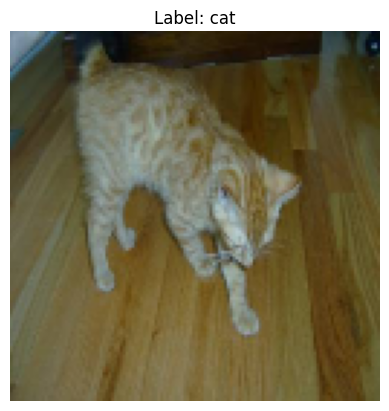

In [24]:
image_array, label = data[0]
plt.imshow(image_array)
plt.title("Label: {}".format("cat" if label == 0 else "dog"))
plt.axis('off')
plt.show()

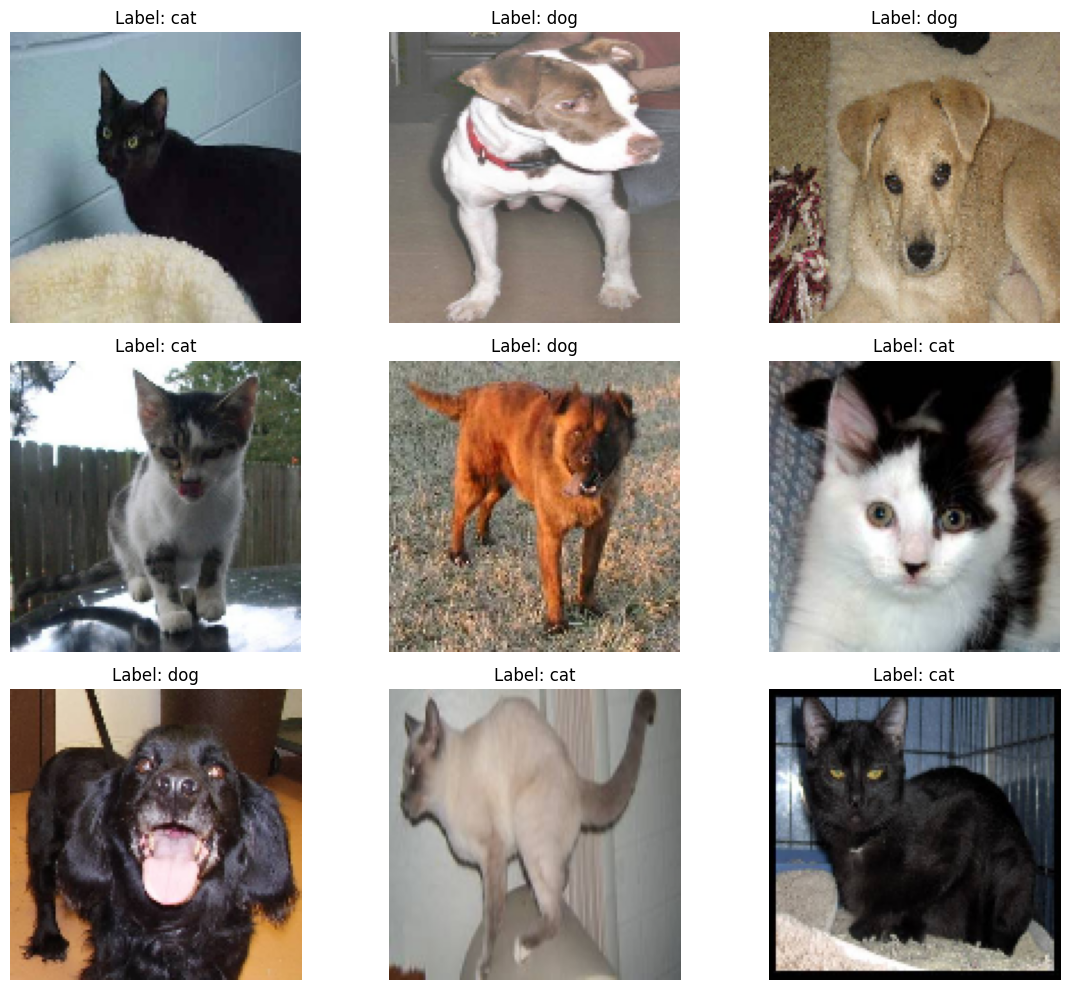

In [25]:
num_images = 9
random_idx = np.random.randint(0, len(data), size=num_images) # random indices
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

for i, idx in enumerate(random_idx):
    image_array, label = data[idx]
    image_array = image_array.astype('uint8')
    # position in the subplot grid
    row = i // 3
    col = i % 3
    axes[row, col].imshow(image_array)
    axes[row, col].set_title("Label: {}".format("cat" if label == 0 else "dog"))
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()

## Splitting data into Training, Validation and Testing data

In our neural network we can have multiple layers where we can do many operations (transfer functions). We can apply techniques to the images: Convolution, Pooling , Padding to optimize and scale down the images. We have input (numbers in matrix) after doing before mentioned operations in the layer then we (multiply the value x to a weight) + bias. Then we run through an activation function. Weights must be static in the end, meaning we iterate (back propagate) untill we end up on something stable. Depending on the error rate, we either lower them or higher them in increments (learning rate) - this is where e.g. ADAM comes in:
The Adam optimizer, which is short for “Adaptive Moment Estimation". It is an iterative optimization algorithm used to minimize the loss function during the training of neural networks. One whole cycle of all the mentioned this is called an epoch.

In [26]:
# Split data into features (X) and labels (y)
X = []
y = []
for features, label in data:
    X.append(features)
    y.append(label)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # Split data into training and validation sets

# Normalize
X_train = X_train / 255.0
X_val = X_val / 255.0

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (16000, 128, 128, 3)
y_train shape: (16000,)
X_val shape: (4000, 128, 128, 3)
y_val shape: (4000,)


In [27]:
# Split test data into features (X_test) and labels (y_test)
X_test = []
y_test = []
for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

# Convert lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Normalize pixel values
X_test = X_test / 255.0

# Print shapes of test data
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (5000, 128, 128, 3)
y_test shape: (5000,)


## Creating a Convolutional Neural Network (CNN) model

Creating our CNN model with 3 convolutional layers:
- First layer with 32 filters
- Second 64 filters
- Third 128 filters

These filters are small matrices that slide over the input images to detect patterns. Each filter in these layers will learn different features from the input images, such as edges, textures, or shapes, at increasingly abstract levels as we move deeper into the network.

In [28]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu", input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,312,961 (12.64 MB)

 Trainable params: 3,312,961 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
epochs = 10
learning_rate = 0.001
validation_split=0.1

In [31]:
model.compile(optimizer=Adam(learning_rate=learning_rate), loss="binary_crossentropy", metrics=["accuracy"])

## Training the model
Now onto fitting the model using 90% for train, 10% for validation

In [32]:
history = model.fit(X_train, y_train, epochs=10, validation_split=validation_split, validation_data=(X_val, y_val))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 147ms/step - accuracy: 0.6139 - loss: 0.6473 - val_accuracy: 0.7340 - val_loss: 0.5604
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 61s 121ms/step - accuracy: 0.7516 - loss: 0.5120 - val_accuracy: 0.7837 - val_loss: 0.4507
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 61s 122ms/step - accuracy: 0.8080 - loss: 0.4140 - val_accuracy: 0.7960 - val_loss: 0.4428
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 61s 122ms/step - accuracy: 0.8505 - loss: 0.3444 - val_accuracy: 0.8125 - val_loss: 0.4060
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 61s 122ms/step - accuracy: 0.8865 - loss: 0.2632 - val_accuracy: 0.8125 - val_loss: 0.4613
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 61s 122ms/step - accuracy: 0.9245 - loss: 0.1824 - val_accuracy: 0.8092 - val_loss: 0.4969
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 61s 122ms/step - accuracy: 0.9640 - loss: 0.0956 - val_accuracy: 0.8152 - val_loss: 0.5861
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 63s 126ms/step - accuracy: 0.9798 - loss: 0

## Validating our model

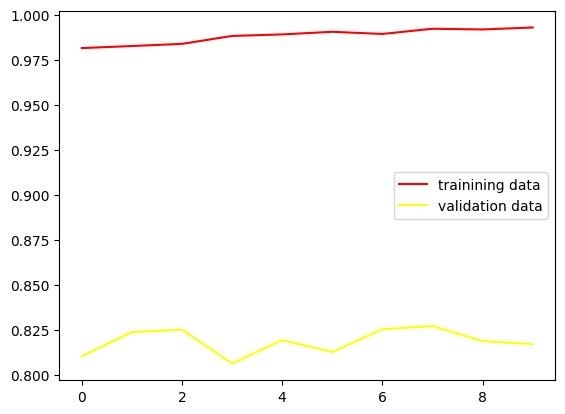

In [19]:
# Validation 1
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red", label="trainining data")
plt.plot(history.history["val_accuracy"], color="yellow", label="validation data")
plt.legend()
plt.show()

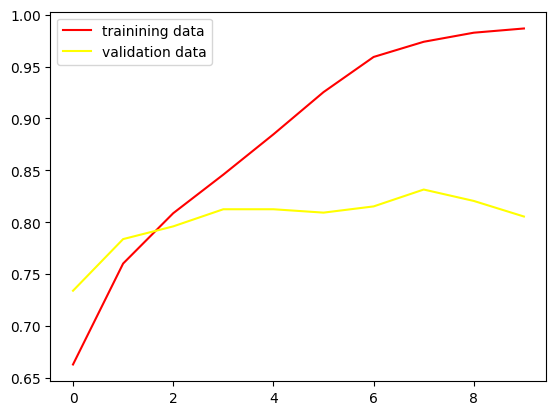

In [33]:
# Validation 2
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red", label="trainining data")
plt.plot(history.history["val_accuracy"], color="yellow", label="validation data")
plt.legend()
plt.show()

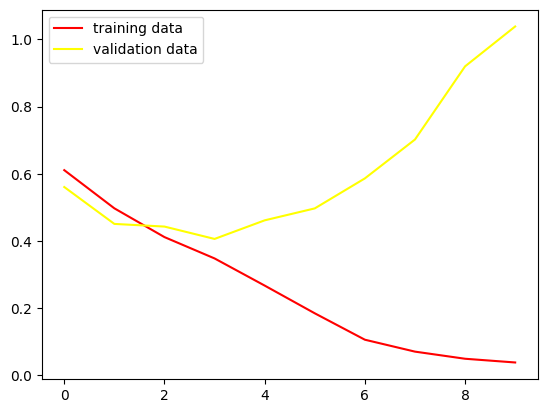

In [34]:
plt.plot(history.history["loss"], color="red", label="training data")
plt.plot(history.history["val_loss"], color="yellow", label="validation data")
plt.legend()
plt.show()

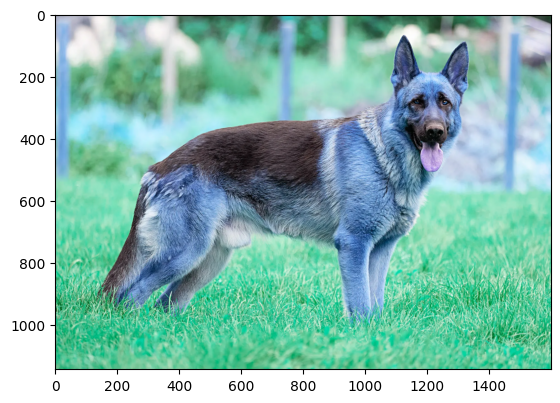

In [35]:
# testing on a random dog image found on google
test_img = cv2.imread("randomdog.png")
plt.imshow(test_img)

In [36]:
test_img.shape

(1144, 1600, 3)

In [37]:
test_img = cv2.resize(test_img, (128, 128))

In [38]:
test_input = test_img.reshape((1, 128, 128, 3))

In [39]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


array([[1.]], dtype=float32)

We see that for the dog image it correctly predicts it to be a dog.

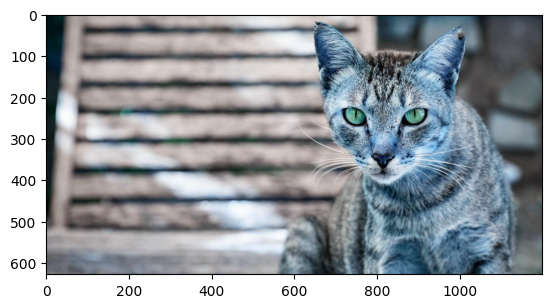

In [40]:
# testing on a random cat image found on google
test_img2 = cv2.imread("randomcat.png")
plt.imshow(test_img2)

In [41]:
test_img2.shape

(628, 1200, 3)

In [42]:
test_img2 = cv2.resize(test_img2, (128, 128))

In [43]:
test_input2 = test_img2.reshape((1, 128, 128, 3))

In [44]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[0.]], dtype=float32)

We see that for the cat image it correctly predicts it to be a cat with a value close to 0.

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step


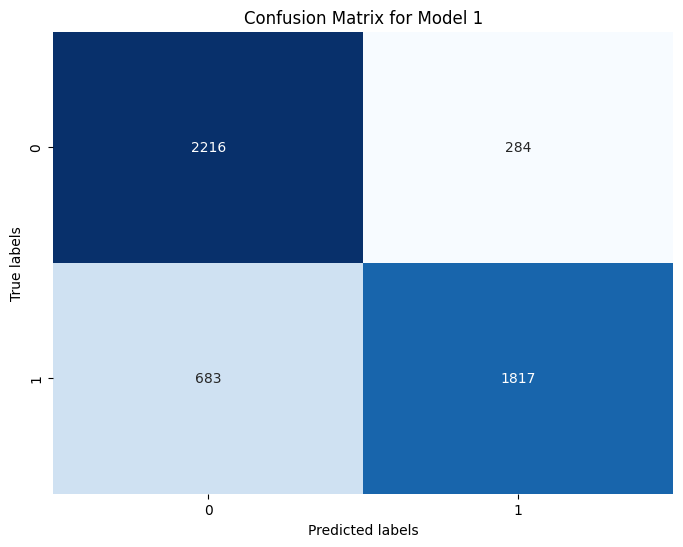

In [45]:
# Assessing the quality of the model using a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the testing data using the first model
y_pred = model.predict(X_test)
y_pred_labels = np.round(y_pred)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Model 1')
plt.show()

We see that our model predicts the following:
- 2216 True Cats
- 284 False Cats
- 683 False Dogs
- 1817 True Dogs

## Second example using data augmentation and loading via flow_from_directory

In [53]:
# Data augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load training and validation data using generators
train_generator = train_datagen.flow_from_directory(
    './train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    './test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [72]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory = "./train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (128, 128)
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = "./test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (128, 128)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [73]:
# Normalize
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

In [74]:
train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [75]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu", input_shape=(128, 128, 3)))
model2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model2.add(Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model2.add(Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model2.add(Flatten())

model2.add(Dense(128, activation="relu"))
model2.add(Dense(64, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

In [76]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,312,961 (12.64 MB)

 Trainable params: 3,312,961 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# Compile the model with optimizer and loss
learning_rate = 0.001
model2.compile(optimizer=Adam(learning_rate=learning_rate), loss="binary_crossentropy", metrics=["accuracy"])

In [78]:
history2 = model2.fit(train_dataset, epochs=epochs, validation_data=validation_dataset)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 136ms/step - accuracy: 0.6260 - loss: 0.6342 - val_accuracy: 0.7784 - val_loss: 0.4772
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 140ms/step - accuracy: 0.7647 - loss: 0.4866 - val_accuracy: 0.7842 - val_loss: 0.4562
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 139ms/step - accuracy: 0.8194 - loss: 0.3959 - val_accuracy: 0.8112 - val_loss: 0.4271
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 137ms/step - accuracy: 0.8595 - loss: 0.3181 - val_accuracy: 0.8274 - val_loss: 0.3889
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.9012 - loss: 0.2364 - val_accuracy: 0.8188 - val_loss: 0.4443
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 128ms/step - accuracy: 0.9338 - loss: 0.1617 - val_accuracy: 0.8228 - val_loss: 0.5359
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 136ms/step - accuracy: 0.9559 - loss: 0.1138 - val_accuracy: 0.8164 - val_loss: 0.6221
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.9684 - loss: 0

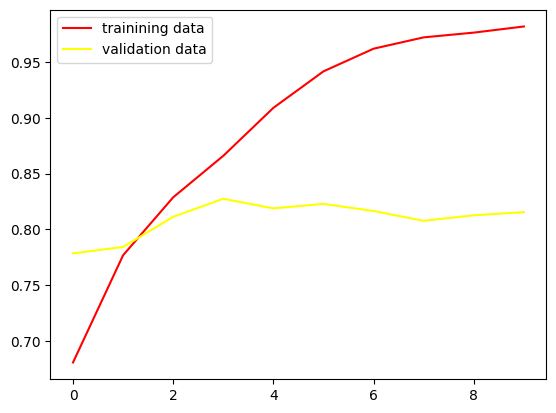

In [79]:
# Validation
import matplotlib.pyplot as plt

plt.plot(history2.history["accuracy"], color="red", label="trainining data")
plt.plot(history2.history["val_accuracy"], color="yellow", label="validation data")
plt.legend()
plt.show()

We see that both methods have around 98% accuracy on the training data and around 81% on the validation data.

In [67]:
# Save the entire model to a single file
model.save("my_model.keras")

In [68]:
# Loading
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("my_model.keras")

/opt/homebrew/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


# Discussion
- **Based on your experience, how would you define ANN and CNN?**
    
    CNN (Convolutional Neural Networks) and ANN (Aritificial Neural Networks) models are both types of neural networks, but they serve different purposes and excel in different domains. 
    
    CNNs are used for data in grid formats, like matrices, which is commonly found in images. They excel in tasks where spatial relationships and patterns within the data are crucial. By utilizing layers that perform operations like convolution and pooling, CNNs can efficiently extract features from images, making them highly effective for tasks such as image classification, object detection, and image segmentation.
    
    On the other hand, ANNs (Artificial Neural Networks) are more general-purpose networks that can be used for a wide range of applications, from binary classification to complex decision-making. However, they are not as efficient as CNNs in handling data stored in grids due to their lack of spatial feature extraction capabilities that CNN models possess.

- **Which hyper-parameters of the CNN architecture have you fine-tuned?** <br>
    We have played withe the following hyperparamiters to fine-tune our CNN model:
    - Batch size
    - Learning rate
    - Epochs number
    - Loss funtions
    - Activation Functions
    - Data Augmentation

- **Which is the role of the activation functions in ANN? Which of them you have implemented? Illustrate them.** <br>

    We have used activation functions such as sigmoid and ReLU to introduce non-linear properties into our model. This ensures that the model can learn more complex patterns in the data. Without non-linearity, adding more layers would still result in behavior akin to that of a single-layer perceptron, which can only learn linear relationships.
    
    Sigmoid
    - Description: The sigmoid function smoothly increases from 0 to 1, exhibiting an S-shaped curve.
    - Utility: It's particularly useful in the output layer of binary classification models where outputs are interpreted as probabilities.
    
    ReLU
    - Description: The ReLU function is zero when x is less than zero and linear with a slope of 1 when x is positive.
    - Advantages: This makes it computationally very efficient and helps to overcome issues like the vanishing gradient problem, which is common in deep networks."
    
    "...without activation functions, the neurons would just be doing boring linear math with the inputs. This means that no matter how many layers of neurons we add to the network, it would still be limited in what it can learn because the output would always be a simple linear combination of the inputs.
    
    Activation functions come to the rescue by introducing non-linearity into the network. This indicates that a neuron’s output can be more complex than a simple linear sum of its inputs. By adding non-linearity, the network can model more complex relationships between the inputs and outputs, allowing it to discover more interesting and valuable patterns.
    
    So, in short, activation functions are like the secret sauce that makes neural networks more powerful by introducing non-linearity and allowing them to learn complex patterns." [link](https://mouaadblhn.medium.com/a-deep-dive-into-activation-functions-a-comprehensive-guide-for-neural-network-beginners-9ec7d03998f0)

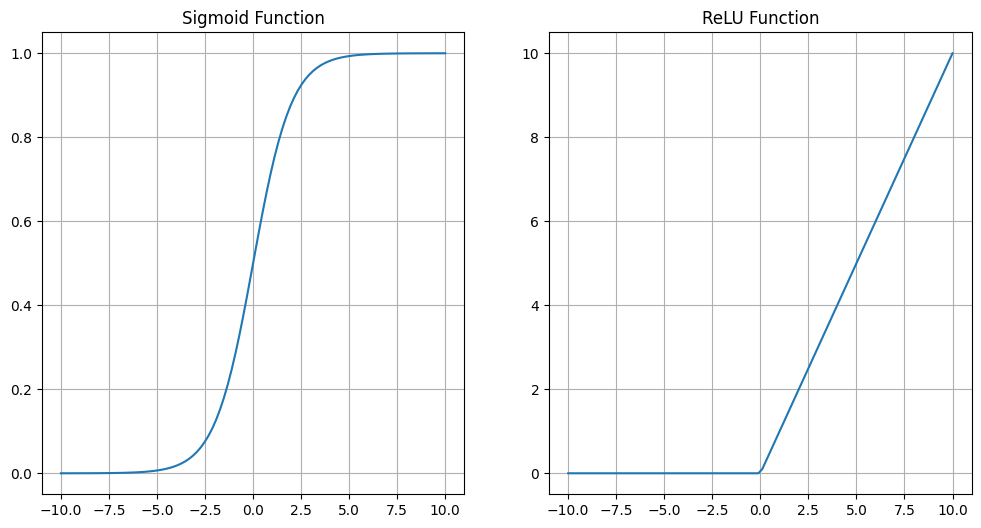

In [70]:
x = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, sigmoid, label="Sigmoid")
plt.title("Sigmoid Function")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, relu, label="ReLU")
plt.title("ReLU Function")
plt.grid(True)

plt.show()

- **Can you see any advantages and disadvantages of ANN and CNN used for classification in
comparison to the other classification algorithms you are familiar with? Give some examples.** <br>
Advantages:
    - Both ANNs and CNNs are excellent at capturing complex, non-linear relationships, which many traditional models struggle with.
    - ANNs are adaptable to various data types and tasks. CNNs excel specifically with grid-like data (e.g., images), leveraging spatial hierarchies effectively.
    - These networks generally perform better with larger datasets, often outperforming traditional models when ample data is available.

    Disadvantages:
    - Data and Resource Demands: They require large amounts of data and significant computational resources (like GPUs), making them less practical for smaller datasets or limited-resource environments.
    - Both ANNs and CNNs are less transparent, making it difficult to understand how exactly they make decisions, which can be problematic in industries requiring clear explanations.
 
    Comparison:
    - Decision Trees and SVMs are generally more interpretable and can be quicker to train on smaller datasets. However, they may not perform as well on very complex or large datasets.
    - Random Forests are more robust to overfitting and also provide importance scores for features, which helps in interpretability, something deep learning models generally lack.
    - K-Nearest Neighbors (KNN) is simple and effective but does not scale well with large datasets or high dimensionality, unlike deep learning models.

# Improvements
Could have used datagenerators to create image varations and onehotencoding on the categories cat & dog.